## Theory of Finance - Assignment 4 Bonds
 <br>
Max Tragl <br>
Asse Reinhardus<br>
Lukas Schreiner

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import scipy.optimize as optimize
import matplotlib.pyplot as plt

In [2]:
#Disable Warnings 
from warnings import filterwarnings
filterwarnings('ignore')

## Question 1.1

In [3]:
#Face value (no face value mentioned in the task. We assume Face value = 100) and annual coupon rate
face_value = 100
coupon = 7

#First year, second year and third year interest rates
first_rate = 0.04
second_rate = 0.05
third_rate = 0.06

#Value of Bond
value_bond = (coupon/(1+first_rate)) + (coupon/((1+second_rate)**2)) + ((coupon + face_value)/((1+third_rate)**3))
print("The price of the three-year-bond is: ", value_bond)

The price of the three-year-bond is:  102.91923886443188


## Question 1.2

In [4]:
# Time horizon = 4 years, Face value = 100, coupon rate annually = 6%, YTM = 2%

#parameters
f = 100
c = 100 * 0.06
ytm = 0.02

#Calculation of bond values dependent on time to maturity
P_4 = c/((1+ytm)**1) + c/((1+ytm)**2) + c/((1+ytm)**3) + (c+f)/((1+ytm)**4)
P_3 = c/((1+ytm)**1) + c/((1+ytm)**2) + (c+f)/((1+ytm)**3)
P_2 = c/((1+ytm)**1) + (c+f)/((1+ytm)**2)
P_1 = (c+f)/((1+ytm)**1)
P_0 = f

bond_values_list = [P_4, P_3, P_2, P_1, P_0]
print("Bond values are, respectively: ", bond_values_list)

Bond values are, respectively:  [115.23091479469716, 111.53553309059109, 107.76624375240291, 103.92156862745098, 100]


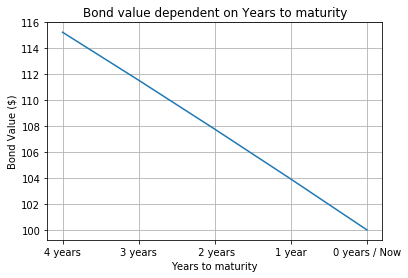

In [5]:
#Plot bond value dependent on time to maturity

#X and Y data: Time (Strings) and Bond values (floats)
time = ["4 years","3 years"," 2 years","1 year", "0 years / Now"]
value = bond_values_list

fig, ax = plt.subplots()
ax.plot(time, value)


ax.set(xlabel='Years to maturity', ylabel='Bond Value ($)',
       title='Bond value dependent on Years to maturity')
ax.grid()

plt.show()

## Question 1.3

In [6]:
#No, this does not necessarily mean that the market anticipates a sharp decline in the price of the BMW share.
#There are multiple reasons why the forward price is smaller than the current stock price.
#One reason could be, that within the next year the stock pays a dividend, hence a couple of weeks, before I get the BMW share.
#Naturally, I'd rather like the dividend to be paid shortly after I become the owner of the share.
#Expected dividends for the life of the future will push your price down, as futures don't pay dividends, so they must
#be cheaper than the underlying.
#The difference in the given share and forward price may also reflect the difference between holding the share and not
#beeing able to invest into a risk free asset and the convenience yield from holding a share. This can be said because we
#assumed that the forward-spot parity holds. 



## Question 2

In [7]:
#Import Data
data = pd.read_excel('PS4_updated1911_2.xlsx', skiprows = list(range(0,8)), nrows = 1173).set_index('Maturity')
data = data.drop(data.columns[4:], axis = 1)

#Rename Columns and Index
data.index.name = 'Date'
data.columns = ['Jan20-3.75%', 'Jan21-3.5%', 'Jan22-3.75%', 'Jan23-4.0%']

#Display Data
data.head()

,Jan20-3.75%,Jan21-3.5%,Jan22-3.75%,Jan23-4.0%
Date,,,,
2013-01-01,97.012,94.822,96.014,97.371
2013-01-02,97.910,95.712,96.940,98.325
2013-01-03,98.025,95.836,97.075,98.455
2013-01-04,98.433,96.265,97.559,98.924
2013-01-07,98.478,96.327,97.638,98.985


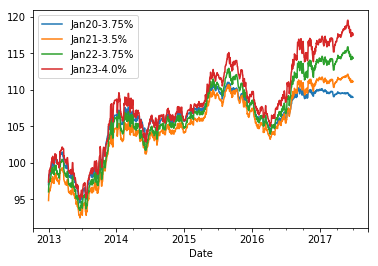

In [8]:
#Plot Data
data.plot(y = data.columns[:4])

## Question 2.1

In [9]:
def timedelta(index_date):
    #'index_date' has to be a Timestamp
    
    #Create a list with all the dates for coupon payments
    coupon_dates = pd.to_datetime(['2012-01-30',
                                   '2013-01-30', 
                                   '2014-01-30', 
                                   '2015-01-30', 
                                   '2016-01-30', 
                                   '2017-01-30',
                                   '2018-01-30'])
    
    #Find all the dates in 'coupon_dates' that are smaller than the input 'index_date'
    #'coupon_dates_larger_index' is a list of booleans
    coupon_dates_smaller_index = [i < index_date for i in coupon_dates]
    
    #Calculate the time delta between the lastest(max) coupon date (that is smaller than 'index_date') and 'index_date'
    timedelta = index_date - max(coupon_dates[coupon_dates_smaller_index])

    return timedelta

In [10]:
#Create a new colum
data['TimeDelta'] = 0

#Loop through the index and calculate all the timedeltas
#Todo: Disable Warning
for i in range(0,len(data.index)):
    data['TimeDelta'][data.index[i]] = timedelta(data.index[i]).days

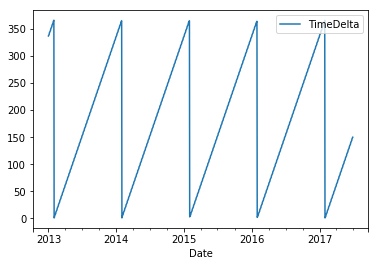

In [11]:
#Plot Time Delta
data.plot(y = 'TimeDelta')

In [12]:
#Create a list of all coupon rates and maturities for all the bonds
interest = [0.0375, 0.035, 0.0375, 0.04]
maturity = [5.5, 6.5, 7.5, 8.5]

#Calculate the accrued interest and add it to the bond price
data['Jan20 incl. ACCI'] = (data['TimeDelta']/360)*interest[0] + data['Jan20-3.75%']
data['Jan21 incl. ACCI'] = (data['TimeDelta']/360)*interest[1] + data['Jan21-3.5%']
data['Jan22 incl. ACCI'] = (data['TimeDelta']/360)*interest[2] + data['Jan22-3.75%']
data['Jan23 incl. ACCI'] = (data['TimeDelta']/360)*interest[3] + data['Jan23-4.0%']

data.head()

,Jan20-3.75%,Jan21-3.5%,Jan22-3.75%,Jan23-4.0%,TimeDelta,Jan20 incl. ACCI,Jan21 incl. ACCI,Jan22 incl. ACCI,Jan23 incl. ACCI
Date,,,,,,,,,
2013-01-01,97.012,94.822,96.014,97.371,337,97.047104,94.854764,96.049104,97.408444
2013-01-02,97.910,95.712,96.940,98.325,338,97.945208,95.744861,96.975208,98.362556
2013-01-03,98.025,95.836,97.075,98.455,339,98.060313,95.868958,97.110313,98.492667
2013-01-04,98.433,96.265,97.559,98.924,340,98.468417,96.298056,97.594417,98.961778
2013-01-07,98.478,96.327,97.638,98.985,343,98.513729,96.360347,97.673729,99.023111


## Question 2.2

The yield to maturity 'ytm' is defined as:

$P = \sum_{k=1}^{K}({c\over(1 + ytm)^m}) + {1\over(1 + ytm)^m} $
<br>


In [13]:
#This function calculates the yield to maturity for a bond with annual coupons
def yield_to_maturity(price, par, periods_to_maturity, coupon):
    #Variables:
    #price : current price of the bond
    #par : face value
    #periods_maturity: how many years are left
    #coupon: interest rate
    
    coupon  = coupon * par
    
    dt = [(i+1) for i in range(int(periods_to_maturity))]
    
    #Define the equation as a lambda function
    yield_to_maturity = lambda ytm : sum([coupon/(1 + ytm)**t for t in dt]) \
                        + par/(1 + ytm)**periods_to_maturity - price
    
    #Find a solution for the equation above
    ytm = optimize.newton(yield_to_maturity, 0.05)
        
    return ytm

In [14]:
#Display prices of the bonds
data.loc[pd.to_datetime('2014-07-31')][:4]

Jan20-3.75%    105.849
Jan21-3.5%     104.014
Jan22-3.75%    104.840
Jan23-4.0%     106.142
Name: 2014-07-31 00:00:00, dtype: float64

In [15]:
#Calculate the YTM for all bonds and store them in a list
ytm = [yield_to_maturity(data.loc[pd.to_datetime('2014-07-31')][i],100,maturity[i], interest[i])\
       for i in [0,1,2,3]]

print('The YTM for the Jan20-3.75% Bond is',round(ytm[0]*100,2),'%')
print('The YTM for the Jan21-3.50% Bond is',round(ytm[1]*100,2),'%')
print('The YTM for the Jan22-3.75% Bond is',round(ytm[2]*100,2),' %')
print('The YTM for the Jan23-4.00% Bond is',round(ytm[3]*100,2),'%')

The YTM for the Jan20-3.75% Bond is 2.28 %
The YTM for the Jan21-3.50% Bond is 2.57 %
The YTM for the Jan22-3.75% Bond is 2.8  %
The YTM for the Jan23-4.00% Bond is 2.96 %


Since all the bonds are noting above par value it is not surprising that the YTM is below the coupon payments. The fact, that the yield to maturity increases as the time to maturity increases also reflects common intrest rates structures with a rising yield curve. 
<br>
<br>

$D = {1\over(1 + ytm)} \sum_{k=1}^{K} m_{k}{cf_{k}\over(1 + ytm)^{m_{k}}} $

In [16]:
#Calculate Dollar Duration for bonds with annual payments
def dollar_duration(ytm, par, periods_to_maturity, coupon):
    
    #Calculate the maturity to coupon payments
    time_coupon_payments = np.array(range(0,int(periods_to_maturity+1)))
    time_coupon_payments = np.add(time_coupon_payments,(periods_to_maturity - int(periods_to_maturity)))
    
    #Dollar duration like the formula above
    dollar_duration = 1/(1 + ytm) * sum([mk * par * coupon/((1 + ytm)**mk) for mk in time_coupon_payments])
    
    return dollar_duration

In [17]:
#Calculate the Dollar Durations with the diffrent specifications for the bonds
dollar_durations = [dollar_duration(ytm[i], 100, maturity[i], interest[i]) for i in [0,1,2,3]]

print('The Dollar Duration for the Jan20-3.75% Bond is',round(dollar_durations[0],4))
print('The Dollar Duration for the Jan21-3.50% Bond is',round(dollar_durations[1],4))
print('The Dollar Duration for the Jan22-3.75% Bond is',round(dollar_durations[2],4))
print('The Dollar Duration for the Jan23-4.00% Bond is',round(dollar_durations[3],4))

The Dollar Duration for the Jan20-3.75% Bond is 60.3604
The Dollar Duration for the Jan21-3.50% Bond is 74.3658
The Dollar Duration for the Jan22-3.75% Bond is 100.9463
The Dollar Duration for the Jan23-4.00% Bond is 132.3776


## Question 2.3

In [18]:
#Create 2 new portfolios
data['Portfolio 1'] = data['Jan20-3.75%'] + data['Jan21-3.5%']
data['Portfolio 2'] = -2*data['Jan22-3.75%'] - 2*data['Jan23-4.0%']
data[data.columns[9:]].head()

,Portfolio 1,Portfolio 2
Date,,
2013-01-01,191.834,-386.770
2013-01-02,193.622,-390.530
2013-01-03,193.861,-391.060
2013-01-04,194.698,-392.966
2013-01-07,194.805,-393.246


In [19]:
#ToDo Bond Duration Matching?

#Calculate the hedge ratio by dividing prices
hedge_ratio = data.loc[pd.to_datetime('2014-07-31')]['Portfolio 1'] / \
              data.loc[pd.to_datetime('2014-07-31')]['Portfolio 2']

print('For each unit long on Portfolio 1, you have to short', \
      round(hedge_ratio, 4),'units of Portfolio 2')

print('The Net Exposure at that day is:', \
      data.loc[pd.to_datetime('2014-07-31')]['Portfolio 1'] + \
      hedge_ratio *  data.loc[pd.to_datetime('2014-07-31')]['Portfolio 2']*(-1))

For each unit long on Portfolio 1, you have to short -0.4973 units of Portfolio 2
The Net Exposure at that day is: 0.0


## Question 3.1

In [20]:
interest_rate = 0.1

#Store bond charateristics in dict
bond_a,bond_b = dict.fromkeys(['FV', 'CP', 'Mat']),dict.fromkeys(['FV', 'CP', 'Mat'])
bond_a['FV'] = bond_b['FV'] = 100
bond_a['CP'] = bond_b['CP'] = 15
bond_a['Mat'],bond_b['Mat'] = 5, 15

In [21]:
#Define Bond Valuation function
def bond_price(FV, CP, Mat, YC):
    #FV: Face Value in USD
    #CP: Coupon payment in USD
    #Mat: Maturity in Years
    #YC: Yield Curve in per cent
    
    periods = range(1,Mat+1)
    
    bond_price = sum([CP/(1 + YC)**m_k for m_k in periods]) + FV/(1 + YC)**periods[-1]
    
    return round(bond_price,2)

In [22]:
#Bond Price A
print('Price A:', bond_price(bond_a['FV'],bond_a['CP'], bond_a['Mat'], interest_rate))

#Bond Price B
print('Price B:', bond_price(bond_b['FV'],bond_b['CP'], bond_b['Mat'], interest_rate))

Price A: 118.95
Price B: 138.03


In [23]:
future_liability = 1000000
pv_future_liability = round(future_liability/(1 + interest_rate)**5,4)
print('PV Liability ', pv_future_liability)

PV Liability  620921.3231


In [24]:
#Check Periods
periods = range(0,5)
value_of_coupons = round(sum([15*(1 + 0.1)**m_k for m_k in periods]),2)
print('You need ',round(future_liability/(value_of_coupons + bond_a['FV']),2), ' of Bond A')

You need  5219.75  of Bond A


## Question 4.1

In [25]:
#Define Function: Input: Fixed: 40-years horizon, Flexible: my, correlation, interest rate today
def interest_forecast(my, p, r_today):
    time_series = []
    
    for s in range(0,41):
        r_next = (1-(p**s)) * my + ((p**s) * r_today)
        time_series.append(r_next)
    
    return time_series


#Produce time series

# my = 5%, p = 0.90, short rate = 0.03
time_series_11 = interest_forecast(0.05, 0.90, 0.03)

# my = 5%, p = 0.90, short rate = 0.05
time_series_12 = interest_forecast(0.05, 0.90, 0.05)

# my = 5%, p = 0.90, short rate = 0.07
time_series_13 = interest_forecast(0.05, 0.90, 0.07)

# my = 5%, p = 0.99, short rate = 0.03
time_series_21 = interest_forecast(0.05, 0.99, 0.03)

# my = 5%, p = 0.99, short rate = 0.05
time_series_22 = interest_forecast(0.05, 0.99, 0.05)

# my = 5%, p = 0.99, short rate = 0.07
time_series_23 = interest_forecast(0.05, 0.99, 0.07)

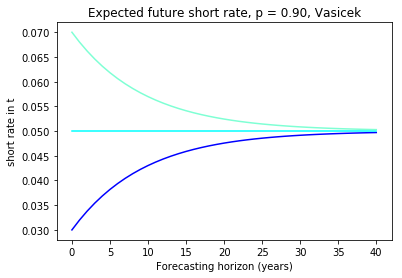

In [26]:
#Plot first 3 time series: p = 0.90
plt.plot(list(range(0,41)), time_series_11, color='blue')
plt.plot(list(range(0,41)), time_series_12, color='aqua')
plt.plot(list(range(0,41)), time_series_13, color='aquamarine')

plt.xlabel('Forecasting horizon (years)')
plt.ylabel('short rate in t')
plt.title('Expected future short rate, p = 0.90, Vasicek')
plt.show()

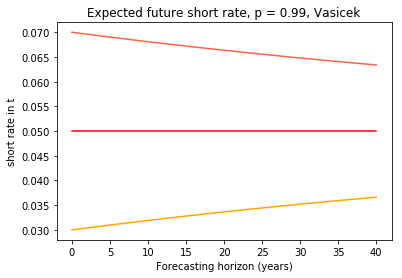

In [27]:
#Plot last 3 time series: p = 0.99
plt.plot(list(range(0,41)), time_series_21, color='orange')
plt.plot(list(range(0,41)), time_series_22, color='red')
plt.plot(list(range(0,41)), time_series_23, color='tomato')
plt.xlabel('Forecasting horizon (years)')
plt.ylabel('short rate in t')
plt.title('Expected future short rate, p = 0.99, Vasicek')
plt.show()

## Question 4.2

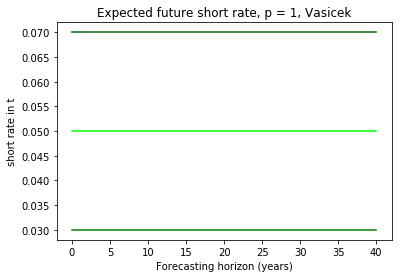

In [28]:
# Re-run Problem 4.1), but set p = 1

# my = 5%, p = 1, short rate = 0.03
time_series_p1_1 = interest_forecast(0.05, 1, 0.03)

# my = 5%, p = 1, short rate = 0.05
time_series_p1_2 = interest_forecast(0.05, 1, 0.05)

# my = 5%, p = 1, short rate = 0.07
time_series_p1_3 = interest_forecast(0.05, 1, 0.07)


#Plot time series: All three lines should stay flat, since p = 1. There is no convergence to my = 0.05
plt.plot(list(range(0,41)), time_series_p1_1, color='green')
plt.plot(list(range(0,41)), time_series_p1_2, color='lime')
plt.plot(list(range(0,41)), time_series_p1_3, color='darkgreen')

plt.xlabel('Forecasting horizon (years)')
plt.ylabel('short rate in t')
plt.title('Expected future short rate, p = 1, Vasicek')
plt.show()
    

#Qualitative Answer to 4.2):
#The main factor that influences the convergence of short interest rates in the given Vasicek model is the correlation
#coefficient p. We assume neither a specific risk premia nor a specific error term. Hence, as said, the convergence
#process is only dependent on p and, naturally, the starting point, in this case the initial short rates
#of 3%, 5% and 7%, respectively. In other words, the further away the given short rate is from my, the longer it takes until r
#converges to my. The lower the correlation coefficient p, the less the interest rate in period t+1 is dependent on the intest rate in t.
#In other words, the lower p, the more noise we allow and the faster the short rate my deviate from its initial level. If p = 1,
#we do not allow for any noise and the level of r in t+1 is fully predicted by the level of r in t. Hence, if p = 1 there is no
#convergence at all. A lower p, however, favours an even faster convgernce. The speed of convergence is thus dependent on p.
#The lower p, the faster, the higher p, the lower r converges to my. After 40 periods, the short rates are close to 5% with
#p = 0.90. In the model with p = 0.99, they are not even close to 5% after 40 periods. The closer r converges to my,
#the smoother the convergence process becomes. In the beginning there is a difference of 2% points(7%-5% and 5%-3%).
#In the model with p=0.90, the change in r in the first 20 periods is much higher than the change in the next (last) 20 periods.
#Obviously, in the given model the interest rate cannot fall below (move above) my, when coming from a higher (lower) initial
#interest rate. As given in the lecture notes, for values of p lower than p = 1, he short rate process is mean-reverting , that
#the expected future short rates are closer to the mean than the current short rate.

## Question 4.3

In [29]:
#Calculate b_n values for each n in a range of 120 time periods. Indicate p (correlation) value
def b_values(p):
    
    #Store all b_n values in this time series
    b_n_values = []
    
    #Calculate b_n values for each of the 120 times periods <===== 120 instead of 40 periods
    for n in range(1,41):
        b_n = (1-(p**n))/((1-p)*n)
        b_n_values.append(b_n)
    
    return b_n_values

#Call function b_values. Do not set b_090 and b_099 equal the generated time series. Generate time series for p = 0.90 & p = 0.99
b_090 = b_values(0.90)
b_099 = b_values(0.99)

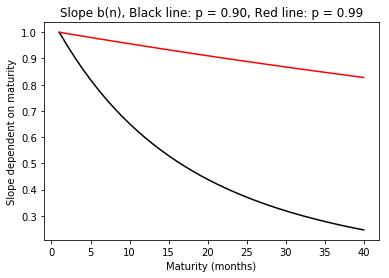

In [30]:
#Plot graphs
plt.plot(list(range (1,41)), b_090, color='black')
plt.plot(list(range (1,41)), b_099, color='red')

plt.xlabel('Maturity (months)')
plt.ylabel('Slope dependent on maturity')
plt.title('Slope b(n), Black line: p = 0.90, Red line: p = 0.99')
plt.show()


In [31]:
#Calculate a_n values for each n in a range of 120 time periods. Indicate p (correlation) value

#Indicate my & and p (correlation)
def a_values(my, p):
    
    #Store all a_n values in this time series
    a_n_values = []
    
    #Calculate a_n values for each of the 120 times periods <===== 120 instead of 40 periods
    for n in range(1,41):
        b_n = (1-(p**n))/((1-p)*n)
        a_n = my * (1-b_n)
        a_n_values.append(a_n)
    
    return a_n_values

#Call function a_values. Do not set a_090 and a_099 equal the generated time series. Generate time series for p = 0.90 & p = 0.99
a_090 = a_values(0.05, 0.90)
a_099 = a_values(0.05, 0.99)

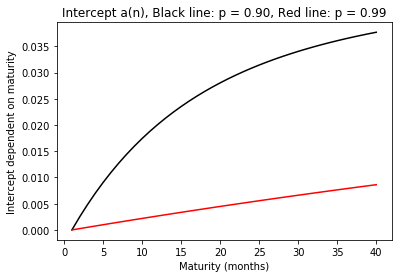

In [32]:
#Plot graphs
plt.plot(list(range (1,41)), a_090, color='black')
plt.plot(list(range (1,41)), a_099, color='red')

plt.xlabel('Maturity (months)')
plt.ylabel('Intercept dependent on maturity')
plt.title('Intercept a(n), Black line: p = 0.90, Red line: p = 0.99')
plt.show()